# Bayesian

## 1. classifier
MAP

### test problem

In [20]:
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

In [ ]:
X, y = make_classification

In [17]:
X, y = make_classification(n_samples=100, 
                           n_features=20,
                           n_informative=3,
                           n_redundant = 2,
                           n_classes=2, 
                           n_clusters_per_class=2, random_state=1)

In [22]:
pca = PCA(n_components=2)

In [23]:
X_ = pca.fit_transform(X)

In [25]:
import matplotlib.pyplot as plt

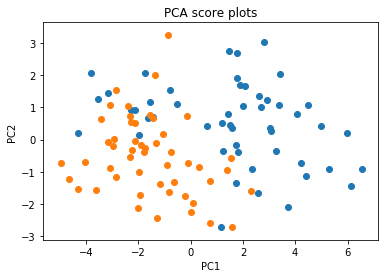

In [30]:
plt.scatter(X_[y==0, 0], X_[y==0, 1], label='0')
plt.scatter(X_[y==1, 0], X_[y==1, 1], label='0')
plt.title('PCA score plots')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [53]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score
import numpy as np

In [33]:
class NaiveBayes(BaseEstimator, ClassifierMixin):
    pass

In [50]:
class GaussianNB(NaiveBayes):
    """
    p(X|y) 是正态分布
    """
    def __init__(self):
        pass
    
    def fit(self, X, y):
        self.classes_, _y = np.unique(y, return_inverse=True)
        self.params = {}
        for _class in self.classes_:
            _X = X[y==_class, :]
            mius, sigma2 = estimate_gaussian(_X)
            self.params[_class] = np.vstack([mius, sigma2])
        self.fitted_ = True
        return self
    
    def predict_proba(self, X, y=None):
        prob = []
        for _class in self.classes_:
            _params = self.params[_class]
            mius, sigma2s = _params
            _probs = log_norm(X, mius, sigma2s)
            prob.append(np.sum(_probs, axis=1))
        prob = np.vstack(prob).T
        return prob
    
    def predict(self, X, y=None):
        prob = self.predict_proba(X, y)#p(X|c), 假设先验p(c)是常数
        yhat = self.classes_[np.argmax(prob, axis=1)]
        return yhat
    
    def score(self, X, y):
        yhat = self.predict(X, y)
        return accuracy_score(y, yhat)
           
def log_norm(x, miu, sigma2):
    logp = -.5*np.log(np.pi*2*sigma2) - .5*(x-miu)**2/sigma2
    return logp

def estimate_gaussian(x):
    mius = np.mean(x, axis=0)
    sigma2 = np.mean((x-mius)**2, axis=0)
    return mius, sigma2

In [51]:
def test_GaussianNB():
    X, y = make_classification()
    gnb = GaussianNB()
    gnb.fit(X, y)
    yhat = gnb.predict(X, y)
    score = gnb.score(X, y)
    print(score)

In [54]:
test_GaussianNB()

0.93


## 参考文献
1. [Naive Bayes](http://scikit-learn.org/stable/modules/naive_bayes.html)

Gaussian Naive Bayes Classifier pass!

## todo: Bayes clustering
EM